In [1]:
import os, glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import constants

from mctools.core import MCSpace, MCStates
from mctools.core.utils import get_state_alignment
from mctools.parser.gaussian import parse_gdvlog, l302_parser_funcs_general, l910_parser_funcs_general

In [2]:
Eh2eV = constants.value('Hartree energy in eV')
eV2Eh = 1 / Eh2eV

wn2eV = 1.23981e-4

data_dir = os.path.join('.')

# Analyze CAS States

In [3]:
casscf_gdvlog = os.path.join(data_dir, 'casscf.log')

parser_funcs = l302_parser_funcs_general | l910_parser_funcs_general

data = parse_gdvlog(casscf_gdvlog, parser_funcs)
cas_space = MCSpace.from_dict(data, max_hole=0, max_elec=0, use_python_int=True)
cas_states = MCStates.from_dict(data, space=cas_space)

cas_space.set_mo_blocks({
    '4f': [(0, 13), 49],
    '5p': [(13, 49)]
})

cas_space.set_config_classes({
    'f13': {'4f': 13, '5p': 36},
    'Lf14': {'4f': 14, '5p': 35},
})

cas_states.analyze()

Reading ./casscf.log
Parsing link l302
Executing: read_ao_overlap_matrix --- Done
Executing: read_ao_kinetic_energy_matrix --- Done
Executing: read_ao_hcore_matrix --- Done
Executing: read_orthogonal_aos_matrix --- Done
Parsing link l910
Executing: read_mc_spec --- Done
Executing: read_ci --- Done
Executing: read_rdm_diags --- Done
Skipping: read_oscillator_strength, parameter n_ground is unavailable


/Users/kirill/Documents/UW/Li_Group/mctools/mctools/core/cistring/graphs.py:329: RuntimeWarning: Using python int as config data type, expect slow performance
  warnings.warn('Using python int as config data type, expect slow performance', RuntimeWarning)
/Users/kirill/Documents/UW/Li_Group/mctools/mctools/core/cistring/graphs.py:61: RuntimeWarning: Using python int as config data type, expect slow performance
  warnings.warn('Using python int as config data type, expect slow performance', RuntimeWarning)


In [5]:
cas_states.df

,E,state,state_source,g,E0,norm,5p,4f,Lf14,f13,config_class,test
0,-56745.342439,1,./casscf.log,0,0.000000e+00,1.0,35.959596,13.040405,0.040405,0.959595,f13,1.0
1,-56745.342439,2,./casscf.log,0,7.088002e-08,1.0,35.972571,13.027429,0.027430,0.972570,f13,1.0
2,-56745.341908,3,./casscf.log,0,1.443997e-02,1.0,35.968076,13.031924,0.031924,0.968076,f13,1.0
3,-56745.341908,4,./casscf.log,0,1.444038e-02,1.0,35.980089,13.019910,0.019910,0.980090,f13,1.0
4,-56745.341905,5,./casscf.log,0,1.450988e-02,1.0,35.963159,13.036843,0.036843,0.963157,f13,1.0
5,-56745.341905,6,./casscf.log,0,1.451039e-02,1.0,35.980532,13.019469,0.019469,0.980531,f13,1.0
6,-56745.340935,7,./casscf.log,0,4.093078e-02,1.0,35.994945,13.005058,0.005058,0.994942,f13,1.0
7,-56745.340934,8,./casscf.log,0,4.093123e-02,1.0,35.995193,13.004808,0.004807,0.995193,f13,1.0
8,-56745.288809,9,./casscf.log,1,1.459340e+00,1.0,35.855709,13.144296,0.144294,0.855706,f13,1.0
9,-56745.288809,10,./casscf.log,1,1.459340e+00,1.0,35.849396,13.150604,0.150603,0.849397,f13,1.0


In [5]:
cas_states.print_state(idx=[0, 1])

#    0: E =     -56745.3Eh
        MO: 4f(13.04) + 5p(35.96)
        |ψ> = f13(95.960%) + Lf14( 4.040%)
------------------------------------------------------------------------------------------------------------------------
 Addr RAS1                        RAS2                        RAS3           Coefficient           
    41 11111111011111111111111111111111111111111111111111 C =  0.014-0.836j |C|^2 =  0.699
     0 11111111111111111111111111111111111111111111111110 C =  0.428+0.000j |C|^2 =  0.183
    39 11111111110111111111111111111111111111111111111111 C = -0.018+0.213j |C|^2 =  0.046
    37 11111111111101111111111111111111111111111111111111 C =  0.113+0.114j |C|^2 =  0.026
    10 11111111111111111111111111111111111111101111111111 C = -0.017+0.156j |C|^2 =  0.025
#    1: E =     -56745.3Eh
        MO: 4f(13.03) + 5p(35.97)
        |ψ> = f13(97.257%) + Lf14( 2.743%)
--------------------------------------------------------------------------------------------------------------------

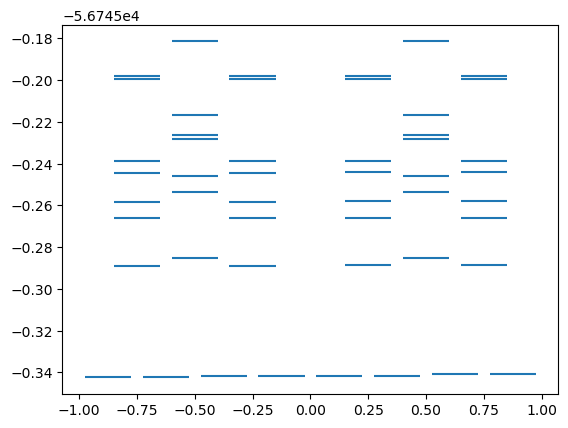

In [6]:
from mctools.plot.states import prepare_state_centers

width = 0.1
x_c = prepare_state_centers(cas_states, column_width=2)

plt.hlines('E', x_c - width, x_c + width, data=cas_states.df)
plt.show()

# Analyze RASCI States

In [7]:
rasci_gs_dir = '/Users/kirill/Documents/UW/Li_Group/CsPbCl3_Ln/calculations/rasci/ras-36p-14f'

gs_space = MCSpace.from_space_spec(
    (36, 14, 12), 37,
    max_hole=2, max_elec=2,
    mo_blocks={
        '3p': [(0, 36)],
        '4f': [(36, 50)],
        'virt': [(50, 62)],
    },
    config_classes={
        'f1': {'3p': 36, '4f': 1, 'virt': 0},
        'Lf2': {'3p': 35, '4f': 2, 'virt': 0}
    }
)

ce3p_cas_gdvlog = os.path.join(rasci_gs_dir, 'rasci_62s.ce3p_casscf_sa14_14s_gb3lyp_ref.tzvppall.gdv_j14p.7491751.log')
data = parse_gdvlog(ce3p_cas_gdvlog, l910_parser_funcs_general)
states = MCStates.from_dict(data, space=gs_space)
states.analyze()

Reading /Users/kirill/Documents/UW/Li_Group/CsPbCl3_Ln/calculations/rasci/ras-36p-14f/rasci_62s.ce3p_casscf_sa14_14s_gb3lyp_ref.tzvppall.gdv_j14p.7491751.log
Parsing link l910
Executing: read_mc_spec --- Done
Executing: read_ci --- Done
Executing: read_rdm_diags --- Done
Skipping: read_oscillator_strength, parameter n_ground is unavailable


In [8]:
ce4p_space = MCSpace.from_space_spec(
    (36, 14, 12), 36,
    max_hole=2, max_elec=2,
    mo_blocks={
        '3p': [(0, 36)],
        '4f': [(36, 50)],
        'virt': [(50, 62)],
    },
    config_classes={
        'f0': {'3p': 36, '4f': 0, 'virt': 0},

        'Lf1': {'3p': 35, '4f': 1, 'virt': 0},
        'Ld1': {'3p': 35, '4f': 0, 'virt': 1},

        'L2f1d1': {'3p': 34, '4f': 1, 'virt': 1},
        'L2f0d2': {'3p': 34, '4f': 0, 'virt': 2},
    }
)

ce4p_cas_gdvlog = os.path.join(rasci_gs_dir, 'rasci_62s.ce4p_gb3lyp_ref.tzvppall.gdv_j14p.7403644.log')
data = parse_gdvlog(ce4p_cas_gdvlog, l910_parser_funcs_general)
ce4p = MCStates.from_dict(data, space=ce4p_space)
ce4p.analyze()

Reading /Users/kirill/Documents/UW/Li_Group/CsPbCl3_Ln/calculations/rasci/ras-36p-14f/rasci_62s.ce4p_gb3lyp_ref.tzvppall.gdv_j14p.7403644.log
Parsing link l910
Executing: read_mc_spec --- Done
Executing: read_ci --- Done
Executing: read_rdm_diags --- Done
Skipping: read_oscillator_strength, parameter n_ground is unavailable


In [9]:
with pd.option_context('max_colwidth', 100_000, 'display.expand_frame_repr', False):
    df = ce4p.get_state_ci_vec([1])
    print(df)

                             C      norm           r1    r2    r3                                                       config_repr config_class
idx addr                                                                                                                                        
1   194     0.500411-0.168521j  0.278810  68715282431    32     0  111111111111111111111101111111111111 00000100000000 000000000000          Lf1
    160     0.152747+0.471134j  0.245299  68718428159    16     0  111111111111111111110111111111111111 00001000000000 000000000000          Lf1
    199    -0.320732+0.104866j  0.113866  68719345663    32     0  111111111111111110111111111111111111 00000100000000 000000000000          Lf1
    164     0.097885+0.299679j  0.099389  68719411199    16     0  111111111111111101111111111111111111 00001000000000 000000000000          Lf1
    191    -0.142523+0.045986j  0.022427  68685922303    32     0  111111111111111111111111101111111111 00000100000000 00000000000

In [10]:
ce4p.print_state(idx=[0, 1, 2], include_mo=True, include_config_class=True, shift_ground=True, config_limit=6)

#    0: E =            0Eh
        MO: 3p(35.88) + 4f( 0.09) + virt( 0.03)
        |ψ> = f0(89.440%) + Lf1( 8.670%) + Ld1( 0.118%) + L2f1d1( 0.000%) + L2f0d2( 0.212%)
------------------------------------------------------------------------------------------------------------------------
 Addr                 RAS1                      RAS2          RAS3               Coefficient           
     0 111111111111111111111111111111111111 00000000000000 000000000000 C = -0.941+0.096j |C|^2 =  0.894
   124 111111111111111111110111111111111111 00010000000000 000000000000 C =  0.009+0.087j |C|^2 =  0.008
   195 111111111111111111111011111111111111 00000100000000 000000000000 C =  0.009+0.087j |C|^2 =  0.008
    86 111111111111111111111101111111111111 00100000000000 000000000000 C =  0.087-0.010j |C|^2 =  0.008
   157 111111111111111111111110111111111111 00001000000000 000000000000 C =  0.009+0.087j |C|^2 =  0.008
   449 111111111111111111101111111111111111 00000000000010 000000000000 C = -0.072+

In [11]:
ce4p.df

,E,state,state_source,g,norm,3p,4f,virt,Ld1,Lf1,L2f0d2,rest,f0,L2f1d1
idx,,,,,,,,,,,,,,
0,-11624.398525,1,/Users/kirill/Documents/UW/Li_Group/CsPbCl3_Ln...,0,0.992161,35.877056,0.094078,0.028871,0.001176,0.086696,0.002116,0.000000,0.894397,0.000000
1,-11624.208718,2,/Users/kirill/Documents/UW/Li_Group/CsPbCl3_Ln...,1,0.948112,34.843072,1.102732,0.054198,0.008502,0.820028,0.000000,0.067562,0.000000,0.002825
2,-11624.208718,3,/Users/kirill/Documents/UW/Li_Group/CsPbCl3_Ln...,1,0.939675,34.843073,1.102732,0.054198,0.007523,0.818489,0.000000,0.056977,0.000000,0.000000
3,-11624.208718,4,/Users/kirill/Documents/UW/Li_Group/CsPbCl3_Ln...,1,0.948099,34.843071,1.102731,0.054198,0.008502,0.820002,0.000000,0.067562,0.000000,0.002825
4,-11624.205538,5,/Users/kirill/Documents/UW/Li_Group/CsPbCl3_Ln...,2,0.922620,34.842682,1.105899,0.051419,0.008673,0.814061,0.000000,0.028493,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,-11624.186860,58,/Users/kirill/Documents/UW/Li_Group/CsPbCl3_Ln...,8,0.921813,34.834995,1.111837,0.053166,0.005314,0.807546,0.000000,0.036880,0.000000,0.000000
58,-11624.186860,59,/Users/kirill/Documents/UW/Li_Group/CsPbCl3_Ln...,8,0.915842,34.834997,1.111839,0.053165,0.008556,0.804478,0.000000,0.025731,0.000000,0.000000
59,-11624.186860,60,/Users/kirill/Documents/UW/Li_Group/CsPbCl3_Ln...,8,0.922227,34.834998,1.111841,0.053165,0.005321,0.808272,0.000000,0.036911,0.000000,0.000000


#  M-Edge Spectrum

In [3]:
rasci_gdvlog = os.path.join(data_dir, 'rasci_3.log')

m_edge_data = parse_gdvlog(rasci_gdvlog, l910_parser_funcs_general, n_ground=14)
medge_space = MCSpace.from_dict(m_edge_data, max_hole=1, max_elec=0)
medge_states = MCStates.from_dict(m_edge_data, space=medge_space)


medge_space.mo_blocks = {
    '3d': [(0, 10)],
    '4f': [(10, 23), 59],
    '5p': [(23, 59)],
}

medge_space.config_classes = {
    'f13': {'3d': 10, '4f': 13, '5p': 36},
    'Lf14': {'3d': 10, '4f': 14, '5p': 35},
    'f14': {'3d': 9, '4f': 14, '5p': 36},
}

medge_states.analyze()

Reading data/rasci_3.log
Parsing link l910
Executing: read_mc_spec --- Done
Executing: read_ci --- Done
Executing: read_rdm_diags --- Done
Executing: read_oscillator_strength --- Done


In [7]:
print(medge_states.df)

                E  state      state_source   g  norm         3d         4f   
idx                                                                          
0   -56745.342439      1  data/rasci_3.log   0   1.0  10.000000  13.040405  \
1   -56745.342439      2  data/rasci_3.log   0   1.0  10.000000  13.027429   
2   -56745.341908      3  data/rasci_3.log   0   1.0  10.000000  13.031923   
3   -56745.341908      4  data/rasci_3.log   0   1.0  10.000000  13.019910   
4   -56745.341905      5  data/rasci_3.log   0   1.0  10.000000  13.036848   
5   -56745.341905      6  data/rasci_3.log   0   1.0  10.000000  13.019469   
6   -56745.340935      7  data/rasci_3.log   0   1.0  10.000000  13.005058   
7   -56745.340934      8  data/rasci_3.log   0   1.0  10.000000  13.004808   
8   -56745.288809      9  data/rasci_3.log   1   1.0  10.000000  13.144299   
9   -56745.288809     10  data/rasci_3.log   1   1.0  10.000000  13.150603   
10  -56745.288804     11  data/rasci_3.log   1   1.0  10.000000 

In [8]:
print(medge_states.peaks.df)

     i_state  f_state       osc       peak_source         dE        3d   
0         14       15  0.001281  data/rasci_3.log   0.019059  0.000000  \
1         13       15  0.001920  data/rasci_3.log   0.019059  0.000000   
2         14       16  0.001921  data/rasci_3.log   0.019059  0.000000   
3         13       16  0.001280  data/rasci_3.log   0.019059  0.000000   
4         14       17  0.002281  data/rasci_3.log   0.019073  0.000000   
..       ...      ...       ...               ...        ...       ...   
589        3       60  0.000004  data/rasci_3.log  58.578217 -0.999999   
590        1       57  0.000012  data/rasci_3.log  58.578745 -0.999999   
591        2       58  0.000014  data/rasci_3.log  58.578747 -0.999999   
592        1       59  0.000012  data/rasci_3.log  58.578747 -0.999999   
593        2       60  0.000009  data/rasci_3.log  58.578748 -0.999999   

           4f        5p  
0    0.970629 -0.970633  
1    0.970510 -0.970514  
2    0.970620 -0.970621  
3    0.

In [6]:
gdvlog = '/Users/kirill/Documents/UW/Li_Group/CrI3_Yb/notebooks/../calculations/mc/x2c_tzvpall_2c/cas_36p_14f/rasci/rasci_68s.r1_2s_6p_10d.casscf_sa50_50s_ref.yb3p.exp.tzvpall.gdv_j14p.7748435.log'

data = parse_gdvlog(gdvlog, l910_parser_funcs, n_ground=14)
medge_space = MCSpace.from_dict(data, max_hole=0, max_elec=0, use_python_int=True)
medge_states = MCStates.from_dict(data, space=medge_space)
medge_spec = MCSpectrum.from_dict(data, states=medge_states)

medge_space.mo_blocks = {
    'M': [(0, 18)],
    '4f':   [(18, 31), 67],
    '5p':   [(31, 67),],

    # 'virt': [(60, 72)],
}

medge_space.config_classes = {
    'f13': {'4f': 13},
    'Lf14': {'5p': 35, '4f': 14},
    'Mf14': {'M': 17, '4f': 14},
}

medge_spec.analyze()

Reading /Users/kirill/Documents/UW/Li_Group/CrI3_Yb/notebooks/../calculations/mc/x2c_tzvpall_2c/cas_36p_14f/rasci/rasci_68s.r1_2s_6p_10d.casscf_sa50_50s_ref.yb3p.exp.tzvpall.gdv_j14p.7748435.log
Parsing link l910
Executing: read_mc_spec
Executing: read_ci
Executing: read_pdm_diags
Executing: read_oscillator_strength


/Users/kirill/Documents/UW/Li_Group/mctools/mctools/core/cistring/graphs.py:316: RuntimeWarning: Using python int as config data type, expect slow performance
  warnings.warn('Using python int as config data type, expect slow performance', RuntimeWarning)
/Users/kirill/Documents/UW/Li_Group/mctools/mctools/core/cistring/graphs.py:60: RuntimeWarning: Using python int as config data type, expect slow performance
  warnings.warn('Using python int as config data type, expect slow performance', RuntimeWarning)


In [7]:
medge_spec.states.df['state'].isin([1, 2])

NameError: name 'medge_spec' is not defined

# Partitioned K-edge Spectrum

In [89]:
spec_space = MCSpace.from_space_spec(
    (12, 14, 10), 13,
    max_hole=2, max_elec=1,
    mo_blocks={
        '1s': [(0, 6)],
        '3p': [(6, 12)],
        '4f': [(12, 26)],
        '5d': [(26, 36)],
    },
)

gdvlogs = sorted(glob.glob(os.path.join(data_dir, 'spectrum', 'part*.log')))

spec_parts = []
for gdvlog in gdvlogs:
    part_data = parse_gdvlog(gdvlog, l910_parser_funcs, n_ground=2)
    spec = MCSpectrum.from_dict(part_data, space=spec_space, sort_peaks=True, )
    spec_parts.append(spec)

Reading data/spectrum/part1.log
Parsing link l910
Executing: read_mc_spec
Executing: read_ci
Executing: read_pdm_diags
Executing: read_oscillator_strength
Reading data/spectrum/part2.log
Parsing link l910
Executing: read_mc_spec
Executing: read_ci
Executing: read_pdm_diags
Executing: read_oscillator_strength


In [116]:
left = spec_parts[0].states
right = spec_parts[1].states

alignment = get_state_alignment(left, right)

In [120]:
sl_l, sl_r, overlap = alignment[2]

dfl = left.df.iloc[sl_l][left.IDX_COLS].rename(columns={
    left.STATE_COL: f'{left.STATE_COL}_left',
    left.SOURCE_COL: f'{left.SOURCE_COL}_left',
})

dfr = right.df.iloc[sl_r][right.IDX_COLS].rename(columns={
    right.STATE_COL: f'{right.STATE_COL}_right',
    right.SOURCE_COL: f'{right.SOURCE_COL}_right',
})

df = pd.concat([dfl.reset_index(drop=True), dfr.reset_index(drop=True)], axis=1)
df['overlap'] = overlap

In [14]:
spec = MCSpectrum.from_spectra(spec_parts)

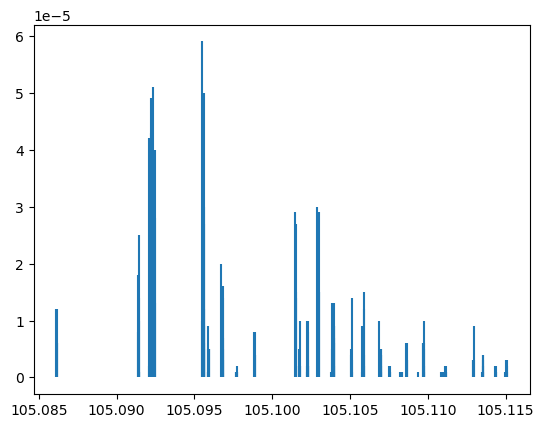

In [15]:
fig, ax = plt.subplots(1, 1)

ax.vlines('dE', 0, 'osc', data=spec.df)
plt.show()

In [16]:
spec.df

,i_state,f_state,osc,source,dE,f,i
idx,,,,,,,
0,1,3,0.000012,data/spectrum/part1.log,105.086119,2,0
1,2,5,0.000012,data/spectrum/part1.log,105.086194,4,1
2,1,5,0.000006,data/spectrum/part1.log,105.086194,4,0
3,1,6,0.000006,data/spectrum/part1.log,105.086194,5,0
4,2,9,0.000018,data/spectrum/part1.log,105.091361,8,1
...,...,...,...,...,...,...,...
147,2,165,0.000001,data/spectrum/part2.log,105.114965,242,1
148,2,167,0.000003,data/spectrum/part2.log,105.115001,244,1
149,1,170,0.000003,data/spectrum/part2.log,105.115084,247,0


In [17]:
rasci_dir = '/Users/kirill/Documents/UW/Li_Group/CsPbCl3_Ln/calculations/rasci/ras-t1u_1s_3p-14_4f-10_5d/dipoles'

gdvlogs = glob.glob(os.path.join(rasci_dir, 'rasci_414s.*ano_cl*.log'))

space = MCSpace.from_space_spec(
    ras=(12, 14, 10),
    elec=13,
    max_hole=2, max_elec=1,
    mo_blocks={
        '1s': [(0, 6)],
        '3p': [(6, 12)],
        '4f': [(12, 26)],
        '5d': [(26, 36)],
    },
)

spec_parts = []
for gdvlog in gdvlogs:
    part_data = parse_gdvlog(gdvlog, l910_parser_funcs, n_ground=14)
    spec = MCSpectrum.from_dict(part_data, space=space, sort_peaks=True)
    spec_parts.append(spec)

spec_parts = sorted(spec_parts, key=lambda x: np.mean(x.energy_range))

Reading /Users/kirill/Documents/UW/Li_Group/CsPbCl3_Ln/calculations/rasci/ras-t1u_1s_3p-14_4f-10_5d/dipoles/rasci_414s.r1_t1u_2t1u.cut_105_30506.ce3p_casscf_sa14_14s_gb3lyp_ref.ano_cl.gdv_j14p.7527806.log
Parsing link l910
Executing: read_mc_spec
Executing: read_ci
Executing: read_pdm_diags
Executing: read_oscillator_strength
Reading /Users/kirill/Documents/UW/Li_Group/CsPbCl3_Ln/calculations/rasci/ras-t1u_1s_3p-14_4f-10_5d/dipoles/rasci_414s.r1_t1u_2t1u.cut_105_13379.ce3p_casscf_sa14_14s_gb3lyp_ref.ano_cl.gdv_j14p.7527806.log
Parsing link l910
Executing: read_mc_spec
Executing: read_ci
Executing: read_pdm_diags
Executing: read_oscillator_strength
Reading /Users/kirill/Documents/UW/Li_Group/CsPbCl3_Ln/calculations/rasci/ras-t1u_1s_3p-14_4f-10_5d/dipoles/rasci_414s.r1_t1u_2t1u.cut_105_21828.ce3p_casscf_sa14_14s_gb3lyp_ref.ano_cl.gdv_j14p.7527806.log
Parsing link l910
Executing: read_mc_spec
Executing: read_ci
Executing: read_pdm_diags
Executing: read_oscillator_strength
Reading /Users/k

In [18]:
MCSpectrum.from_spectra(spec_parts)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer